<a href="https://colab.research.google.com/github/ajou20658/2023S-Ajou-ML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2

이번 과제에서는 대출의 승인 여부(Status)를 예측하는 데이터셋을 사용합니다.
<br>
HW1에서 제공한 데이터셋과는 다른 데이터셋입니다. bb에 업로드된 train.csv를 사용하여 과제를 진행해주세요.

[원본 데이터셋 링크](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?select=loan_train.csv)

## 주의
✋ 작성한 모든 코드에 주석을 작성할 것
<br>
✋ 이번 과제에서는 보고서 제출 X, 다만 문제 풀이 파일을 제출해야 함!

## 코랩 연결 및 라이브러리 불러오기

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [42]:
df = pd.read_csv('./train.csv') # 제공된 train.csv 사용 # 환경에 맞게 path 조절 가능

In [43]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [44]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [45]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


## 간단한 EDA

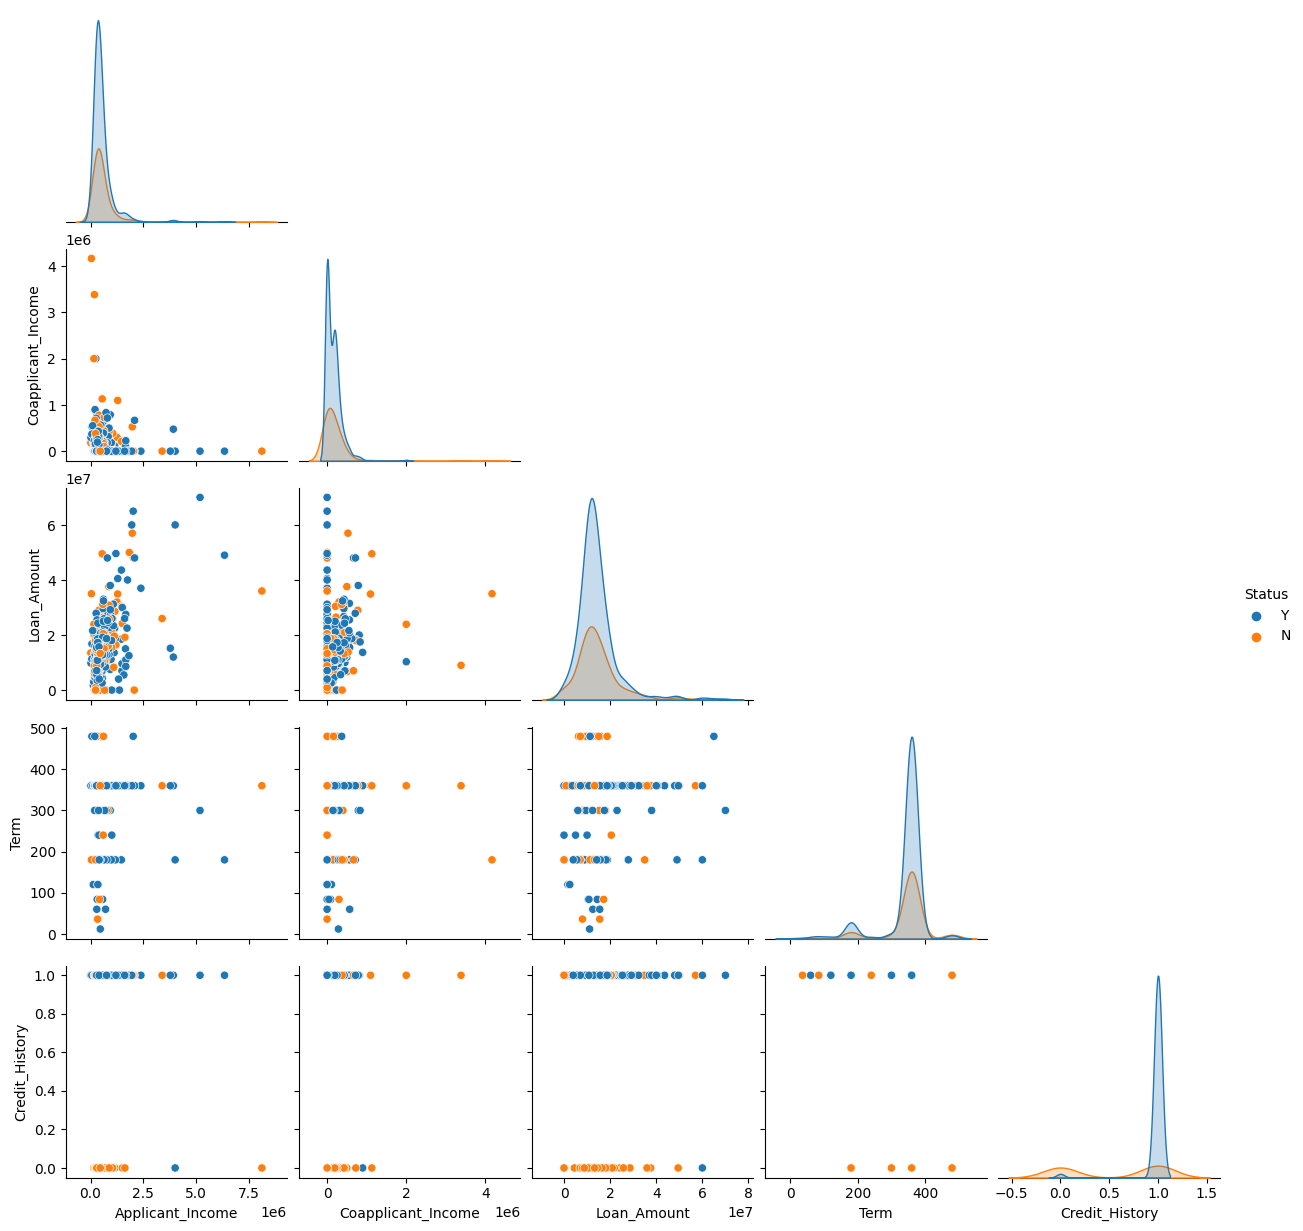

In [47]:
sns.pairplot(df,corner=True,hue='Status') # 이 데이터의 타겟 변수(예측하고자 하는 변수)는 'Status'입니다

<Axes: >

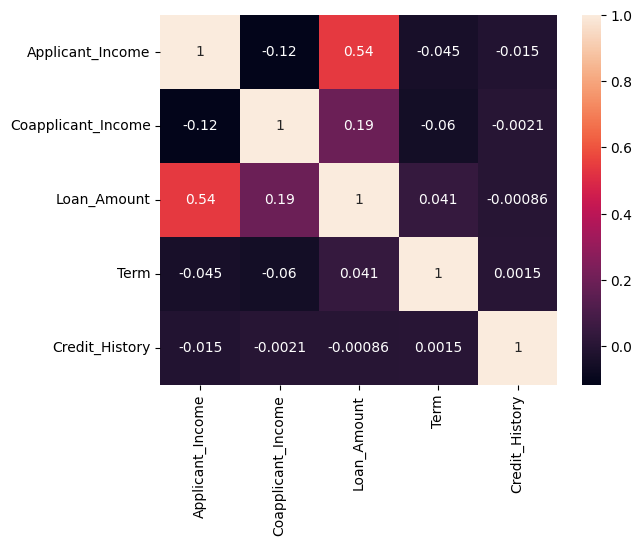

In [48]:
sns.heatmap(df.corr(),annot=True) # numerical feature들끼리의 correlation

## 결측치 확인

In [49]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

## 문제1: Categorical feature missing value drop
categorical feature에서 결측값이 있는 row를 삭제하세요.  
참고) sklearn 패키지에서 제공하는 imputer를 사용하면 최빈값으로 categorical feature의 결측 값도 채울 수 있으나, 편의 상 결측값이 있는 행을 삭제하겠습니다.

In [50]:
## 문제 1 ##
# 코드 작성
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음
df = df.dropna(subset=categorical)
df=df.drop('Credit_History',axis=1)
df
##########

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,Urban,Y


## 문제2: Label Encoding
모든 categorical feature들을 Label Encoding하여 numerical feature로 바꾸세요.
* LabelEncoder()를 사용하세요

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음

In [53]:
## 문제 2 ##
# 코드 작성
numerical = list(df.select_dtypes(include='int64').columns)
numerical += list(df.select_dtypes(include='float64').columns)
numerical.remove('Term')
encoder = LabelEncoder()
for i in categorical:
  result = encoder.fit_transform(df[i])
  df[i]=result
df.dtypes
##########

Gender                  int64
Married                 int64
Dependents              int64
Education               int64
Self_Employed           int64
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Area                    int64
Status                  int64
dtype: object

In [54]:
df # categorical -> numerical 로 바뀌었는지 확인

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,2,1
612,1,1,2,0,0,758300,0.0,18700000,360.0,2,1


## 문제 3: KNN imputer
위에서 이 데이터셋의 numberical feature에도 결측치가 있음을 확인했습니다.   
categorical feature에서는 결측치가 있는 행을 drop하였지만 numerical feature 중 결측치가 있는 'Term', 'Credit_History'열에 대해서 KNN imputer를 사용하여 결측치를 채워봅시다.

### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

### 문제 3-2
주어진 코드틀에서 k개의 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [55]:
import tqdm

In [56]:
#pd.set_option('display.max_row', 554) #디버깅용 출력제한 해제
df['Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Term, Length: 554, dtype: float64

In [57]:
class Knn_imputer():
  def __init__(self, n_neighbors): 
        
    ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
    self.k = n_neighbors    
  
  ## knn 은 lazy learning 입니다.
  def fit(self,X):
      self.X = X

  def predict(self, X, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명

    for i in tqdm.tqdm(range(len(X))):
     if pd.isnull(X[feat_name].iloc[i]): # feat_name 열에 있는 결측값 확인
        
        distance = self.dist(X, X.iloc[i], feat_name) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
        
        sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기
        
         ################  문제 3-2  ####################
         # k개의 "feat_name" 값을 보고 평균 내어 값을 결정하기
         # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
         # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################
        add=0
        for k in range(1,self.k+1):
          add+=X[feat_name].iloc[sorted_dist[k][0]]
        df[feat_name].iloc[i]=add/self.k




        

        ################ 코드 끝  ######################
        ##############################################
        
  
  def dist(self, X, y, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
    num_train = X.shape[0]
    X = X.drop(feat_name, axis=1)
    #axis=1 -> column에 해당됨.
    #X에는 feat_name이 제외된 csv가 할당됨
    y = y.drop(feat_name)

    #y에는 feat_name이 제외된 행(샘플 1개)가 반환됨

    dist_dict = {} ## {index : distance} 형태

    for i in range(num_train):
    
    ################  문제 3-1  ####################
    # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
    # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
    # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
    ################ 코드 시작  #####################
      #결측값있는 행만 들어옴
      diff=np.array(X.iloc[i])-np.array(y)
      squared_diff=np.square(diff)
      summed_diff=np.sum(squared_diff, axis=0)
      dist_dict[i]=summed_diff
      
     
    ################ 코드 끝  ######################
    ##############################################
    return dist_dict


In [58]:
# 아래 숫자는 변경하셔도 상관 없습니다.
imputer = Knn_imputer(3)
categorical.append('Term')
normalized_df=df
normalized_df[numerical]=(df[numerical]-df[numerical].mean())/df[numerical].std()

imputer.fit(normalized_df)
# test set에 대해 predict를 진행합니다.
imputer.predict(normalized_df, 'Term')

  0%|          | 0/554 [00:00<?, ?it/s]<ipython-input-57-ffe423d10e12>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i]=add/self.k
<ipython-input-57-ffe423d10e12>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i]=add/self.k
  7%|▋         | 39/554 [00:00<00:02, 229.98it/s]<ipython-input-57-ffe423d10e12>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i]=add/self.k
<ipyth

In [59]:
df.isnull().sum() # 결측치가 채워졌는지 확인

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Area                  0
Status                0
dtype: int64

In [60]:
df['Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Term, Length: 554, dtype: float64

## 문제 4: correlation
DataFrame df에 대해서 correlation heatmap을 그린 후, Status에 가장 영향을 주는 feature는 무엇인지 서술하세요

* Status에 가장 영향을 주는 feature에 대한 서술
:

<Axes: >

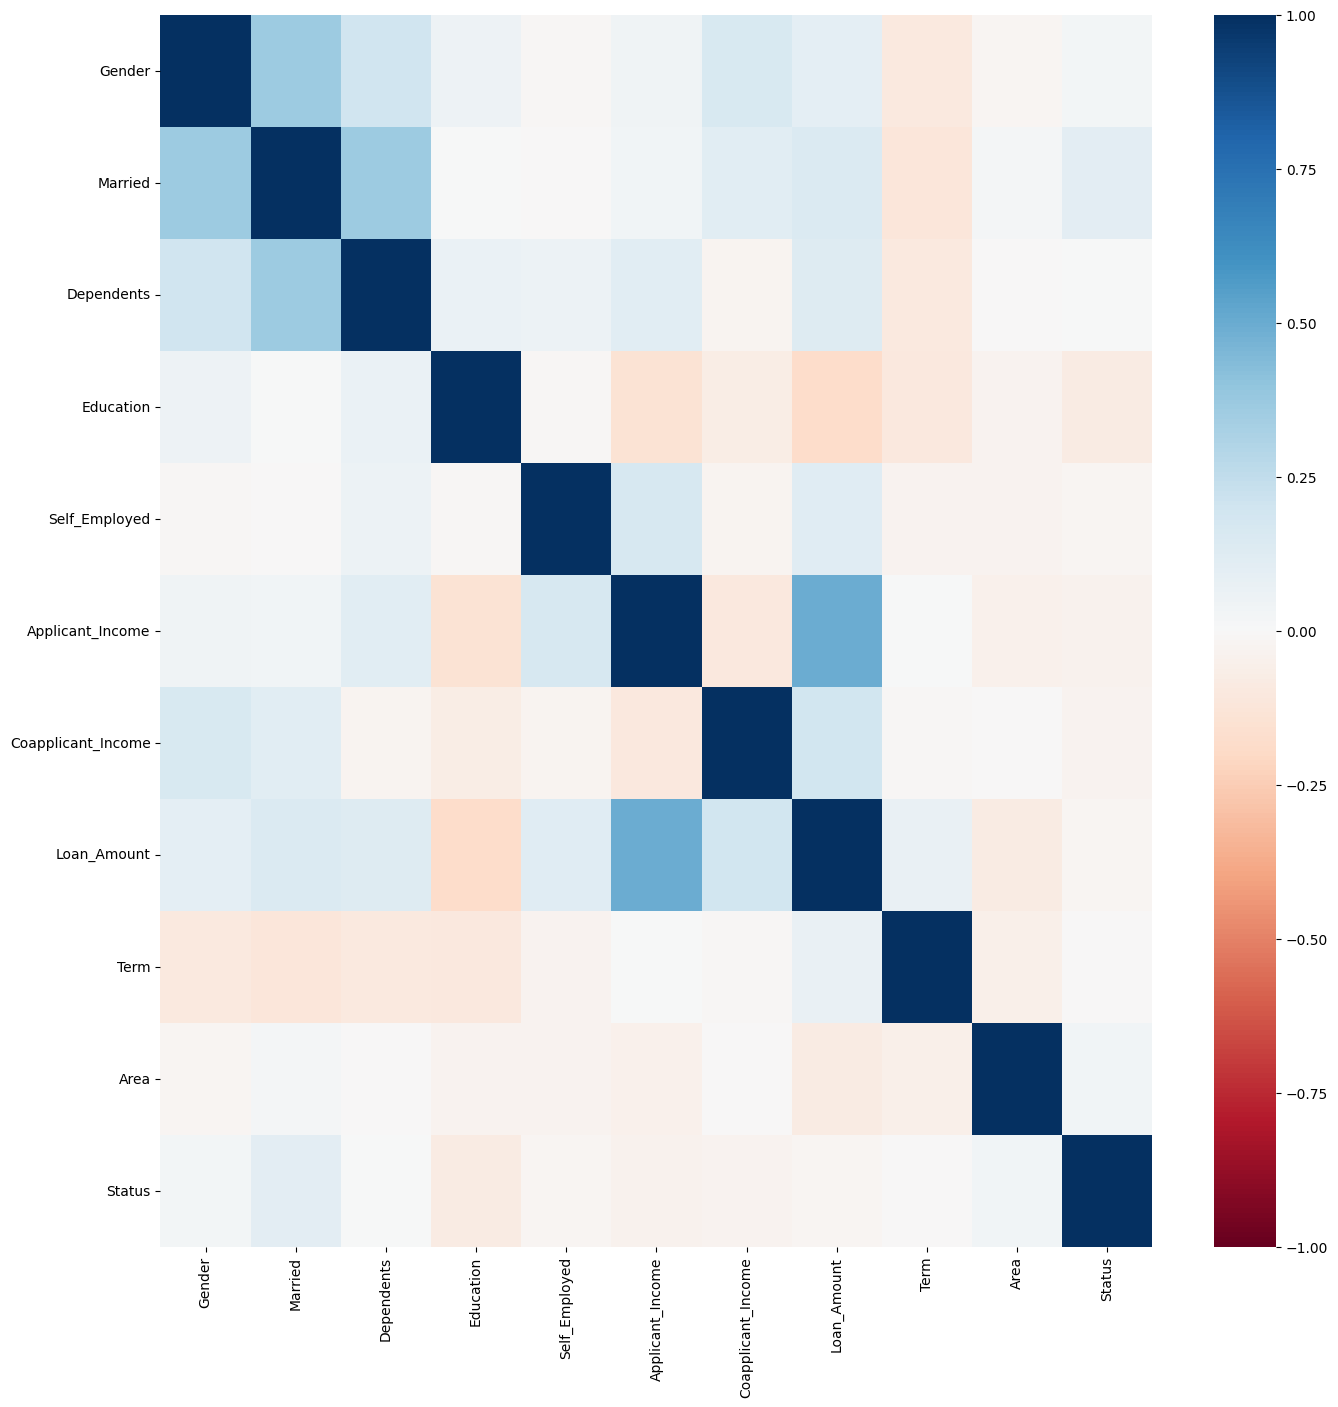

In [61]:
plt.figure(figsize = (16,16)) # figure 사이즈 조절

## 문제 4 ##
# 코드 작성
corr=df.corr()
sns.heatmap(corr,cmap='RdBu',vmin=-1,vmax=1)
############

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.

In [62]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1) # target feature가 Status(대출의 승인 여부)
y = df['Status']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (442, 10)
y_train's shape :  (442,)

X_val's shape :  (56, 10)
y_val's shape :  (56,)

X_test's shape :  (56, 10)
y_test's shape :  (56,)


## 문제5: KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

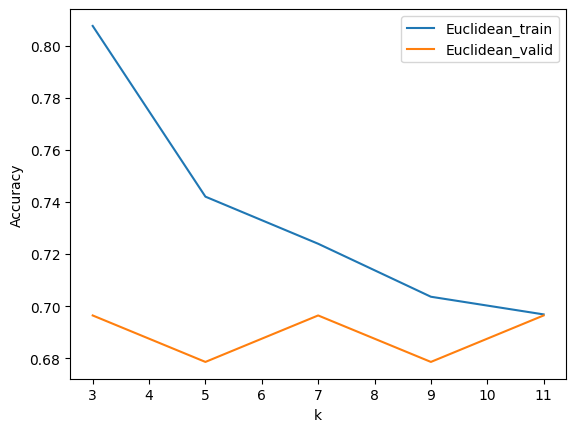

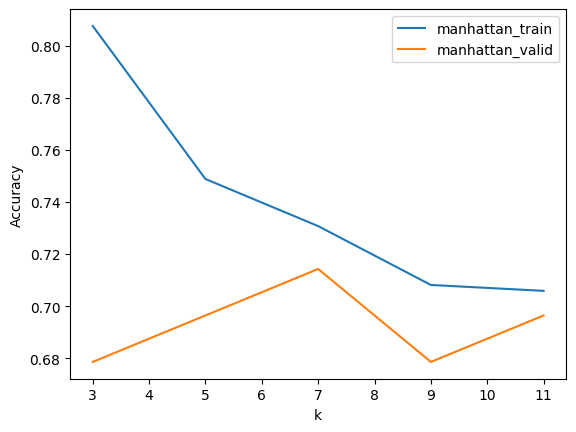

In [64]:
### 문제 1 ###
### 코드 작성 ###
distance_metrics=['euclidean','manhattan']
k_values=[3,5,7,9,11]
train=[]
valid=[]
bestacc=0
bestk=0
bestmetrics=''
for dst in distance_metrics:
  for k in k_values:
    term=KNeighborsClassifier(n_neighbors=k,metric=dst)
    term.fit(X_train,y_train)

    accuracy = term.score(X_train,y_train)
    train.append(accuracy)
    if accuracy>bestacc:
      bestacc=accuracy
      bestk=k
      bestmetrics=dst

    accuracy = term.score(X_val,y_val)
    valid.append(accuracy)
        



plt.plot(k_values,train[:len(k_values)],label='Euclidean_train')
plt.plot(k_values,valid[:len(k_values)],label='Euclidean_valid')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(k_values,train[len(k_values):],label='manhattan_train')
plt.plot(k_values,valid[len(k_values):],label='manhattan_valid')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

################

In [65]:
term=KNeighborsClassifier(n_neighbors=bestk,metric=bestmetrics)

term.fit(X_train,y_train)
accuracy = term.score(X_test,y_test)
print(accuracy)

0.6428571428571429


**설명 작성**  
- 최적의 파라미터:
- 설명:

## 문제6 Cross validation with Linear SVM
### 6-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - C 이외의 하이퍼파라미터는 임의로 설정 가능
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 6-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - C 이외의 하이퍼파라미터는 임의로 설정 가능
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [66]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

<ipython-input-67-e10f96dd4424>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_svm.append(X_val)
<ipython-input-67-e10f96dd4424>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_svm.append(y_val)


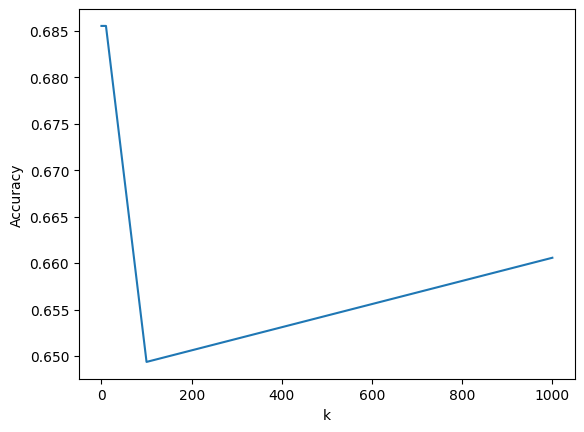

0.001
0.7142857142857143


In [67]:
## 문제 6-1 ##
# 코드 작성
# X_train y_train 사용
x=[0.001,0.01,0.1,1,10,100,1000]
X_svm=X_train
y_svm=y_train
X_svm.append(X_val)
y_svm.append(y_val)

accuracy=[]
bestx=0
bestaccuracy=0
# print(y_train)
# print(y_svm)
for i in x:
  svm = SVC(C=i,kernel="linear")
  cv_scores=cross_val_score(svm,X_svm,y_svm,cv=5)
  
  termacc=np.mean(cv_scores)
  accuracy.append(termacc)
  if termacc>bestaccuracy:
    bestx=i
    bestaccuracy=termacc

plt.plot(x,accuracy,label="linear")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()
svm = SVC(C=bestx,kernel='linear')
svm.fit(X_svm,y_svm)
result=svm.score(X_test,y_test)
print(bestx)
print(result)
############

**설명 작성**  
- 최적의 파라미터:
- 설명:

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

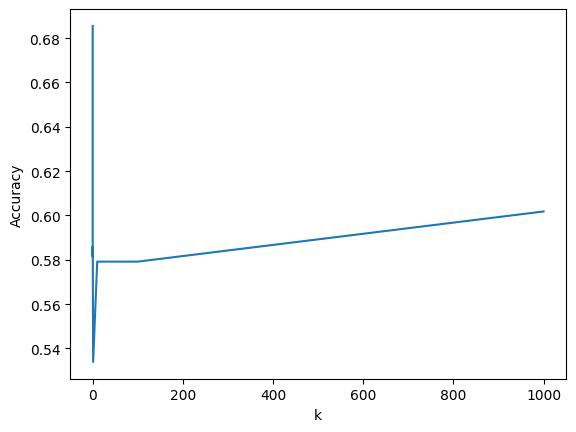

0.001
0.7142857142857143


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [68]:
## 문제 6-2 ##
# 코드 작성
x=[0.001,0.01,0.1,1,10,100,1000]
X_svm=X_train
y_svm=y_train
X_svm.append(X_val)
y_svm.append(y_val)
accuracy=[]
bestx=0
bestaccuracy=0
# print(y_train)
# print(y_svm)
loo = LeaveOneOut()
for i in x:
  svm = LinearSVC(C=i)
  cv_scores=cross_val_score(svm,X_svm,y_svm,cv=loo)
  termacc=np.mean(cv_scores)
  accuracy.append(termacc)
  if termacc>bestaccuracy:
    bestx=i
    bestaccuracy=termacc


plt.plot(x,accuracy,label="linear")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()
svm = LinearSVC(C=bestx)
svm.fit(X_svm,y_svm)
result=svm.score(X_test,y_test)
print(bestx)
print(result)
############

**설명 작성**  
- 최적의 파라미터:
- 설명:

## 문제7 Cross validation with SVM
### 7-1: k-fold
- 문제6-1 코드에서 kernel을 바꾸어 k-fold를 진행하세요
- C는 2로 설정하고 k=5로 설정합니다.

### 7-2: Leave One Out
- 문제6-2 코드에서 kernel을 바꾸어 Leave one out를 진행하세요
- C는 2로 설정합니다.

### 7-3: 데이터의 특성
문제 6의 결과와 7-1, 7-2의 결과를 비교하여 보았을 때 주어진 데이터는 어떤 관계인지 (선형, 비선형)인지 적고, 왜 그런지 그 이유를 서술하세요


In [69]:
## 문제 7-1 ##
# 코드 작성
#x=[0.001,0.01,0.1,1,10,100,1000]
X_svm=X_train
y_svm=y_train
X_svm.append(X_val)
y_svm.append(y_val)

svm = SVC(C=2,kernel="rbf")
cv_scores=cross_val_score(svm,X_svm,y_svm,cv=5)
print(np.mean(cv_scores))
############

0.6855209397344229


<ipython-input-69-f8e1be01a899>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_svm.append(X_val)
<ipython-input-69-f8e1be01a899>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_svm.append(y_val)


In [70]:
## 문제 7-2 ##
# 코드 작성
## 문제 6-2 ##
# 코드 작성
X_svm=X_train
y_svm=y_train
X_svm.append(X_val)
y_svm.append(y_val)

loo = LeaveOneOut()
svm = SVC(C=2,kernel="rbf")
cv_scores=cross_val_score(svm,X_svm,y_svm,cv=loo)
print(np.mean(cv_scores))


<ipython-input-70-07072d2fc122>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_svm.append(X_val)
<ipython-input-70-07072d2fc122>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_svm.append(y_val)


0.6855203619909502


**7-3 설명 작성**  
- 설명:

## 문제 8: Grid search
### 문제 8-1
주어진 param_grid에 대해서 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고 best hyperparameter를 출력하세요.  
* 아래의 주어진 패키지를 사용합니다.



In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [72]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [73]:
## 문제 8-1 ##
## 코드 작성 ##
RFC=RandomForestClassifier()
Grid=GridSearchCV(estimator=RFC,param_grid=param_grid,scoring='accuracy',cv=5)
Grid.fit(X_train,y_train)
print(Grid.best_params_)
############

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 200}


### 문제 8-2
8-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 후 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.

In [74]:
from sklearn.metrics import accuracy_score

In [76]:
## 문제 8-2 ##
## 코드 작성 ##
RFC=RandomForestClassifier(n_estimators=200,max_features='sqrt',max_depth=6,criterion='gini')
RFC.fit(X_train,y_train)
print(RFC.score(X_test,y_test))
############

0.7142857142857143
